# 1. Importing files 


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
path = r'/Users/nurgul/Instacart Basket Analysis'

In [3]:
# Importing Data set customers.csv
df_ords_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','ords_prods_customers_left.pkl')) 

In [4]:
df_ords_customers.shape

(32404859, 33)

In [5]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_name               object 
 2   department_id              int64  
 3   prices                     float32
 4   order_id                   int64  
 5   user_id                    int64  
 6   order_number               int64  
 7   orders_day_of_week         int64  
 8   hour_of_day_ordered        int64  
 9   days_since_prior_order     float64
 10  add_to_cart_order          int64  
 11  reordered                  int64  
 12  price_range_loc            object 
 13  busiest_dat                object 
 14  Busiest_day                object 
 15  busiest_day                object 
 16  busiest_peroid_of_the_day  object 
 17  max_order                  int64  
 18  loyalty_flag               object 
 19  mean_spend                 float64
 20  

# 2. Creating visualizations 

### 2.1 Analyse Orders Day of Week

In [6]:
# count rows for each day of the week
df_ords_customers['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

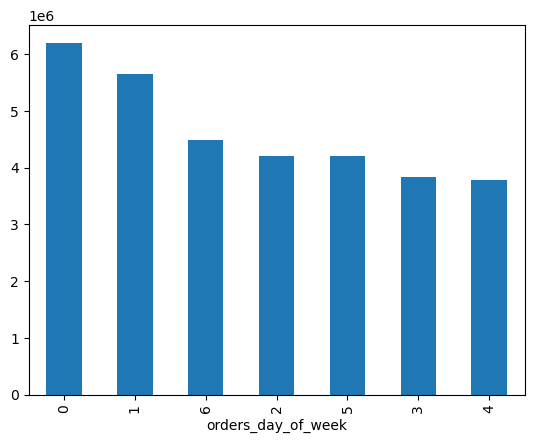

In [7]:
# Creating Bar Charts
df_ords_customers['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

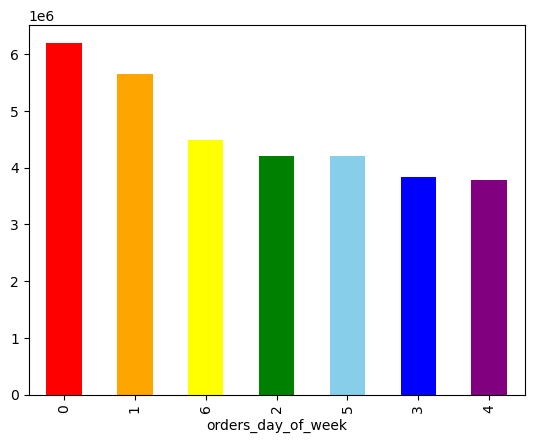

In [8]:
#Changing colors 
df_ords_customers['orders_day_of_week'].value_counts().plot.bar(color=['red', 'orange', 'yellow', 'green', 'skyblue', 'blue', 'purple'])

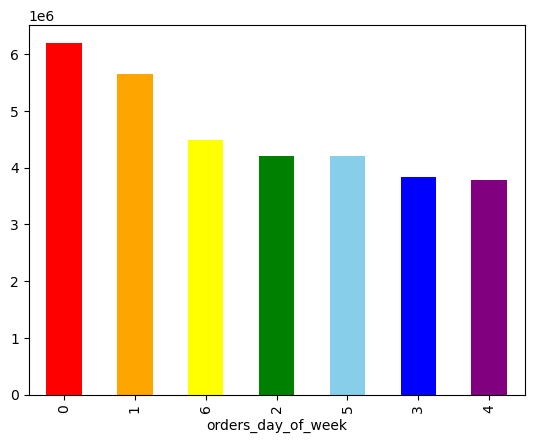

In [9]:
# Saving bar chart 
bar=df_ords_customers['orders_day_of_week'].value_counts().plot.bar(color=['red', 'orange', 'yellow', 'green', 'skyblue', 'blue', 'purple'])

In [10]:
#Exporting bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

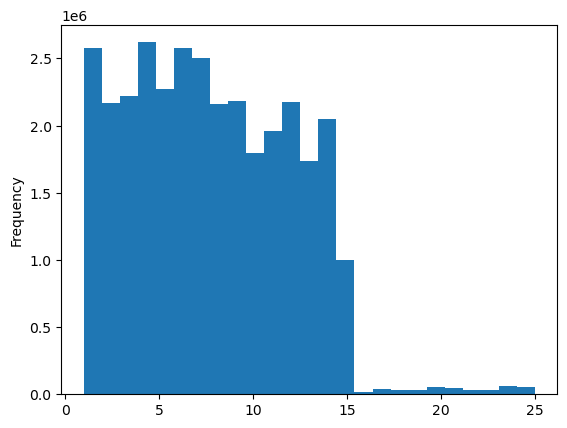

In [11]:
#Creating histogram 
df_ords_customers['prices'].plot.hist(bins=25)

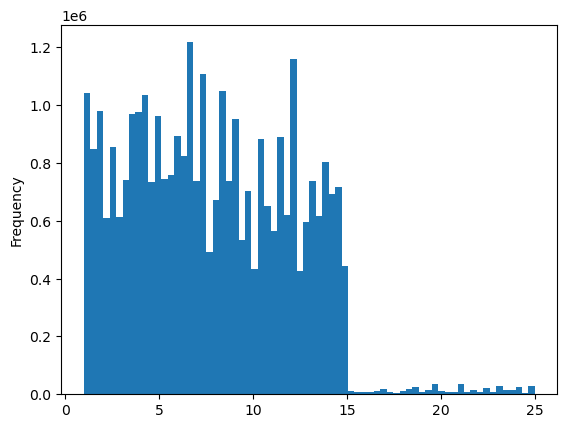

In [12]:
# historgram of prices using 70 bins
hist_2 = df_ords_customers['prices'].plot.hist(bins = 70)

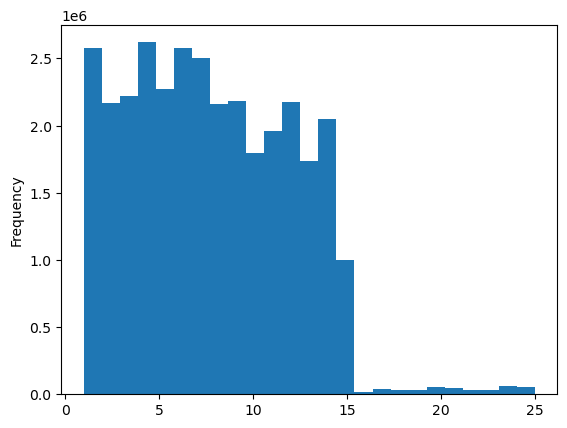

In [13]:
#Exporting histogram 
hist=df_ords_customers['prices'].plot.hist(bins=25)
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [14]:
#Creating Line chart 
df=df_ords_customers[:2000000]

### Sampling data

In [15]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev=np.random.rand(len(df_ords_customers))<= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [18]:
# Store 70% of the sample in the dataframe big 
big=df_ords_customers[dev]

In [19]:
# Store 30% of the sample in the dataframe small 
small=df_ords_customers[~dev]

In [20]:
len(df_ords_customers)

32404859

In [21]:
len(big)+len(small)

32404859

In [22]:
df_2=small[['orders_day_of_week', 'prices']]

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

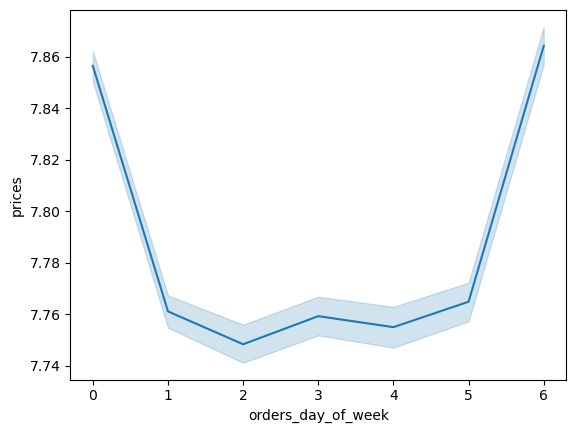

In [23]:
# Creating Line chart 
line=sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

In [24]:
line.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_orders_days_vs_prices.png'))

# 3. Analyze Order Hour of Day 

In [25]:
print(df.columns)

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'hour_of_day_ordered',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_dat', 'Busiest_day', 'busiest_day',
       'busiest_peroid_of_the_day', 'max_order', 'loyalty_flag', 'mean_spend',
       'spender_flag', 'median_order_frequency', 'order_frequency_flag',
       'mean_expenses', 'first name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')


In [4]:
df_hdo = df_ords_customers[['hour_of_day_ordered']]

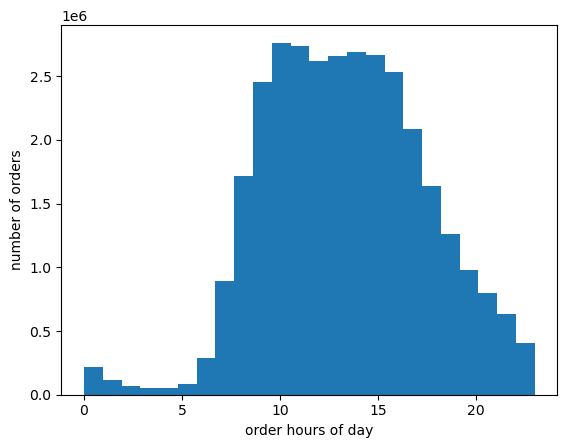

In [6]:
hist_hdo = df_hdo['hour_of_day_ordered'].plot.hist(bins=24, xlabel='order hours of day', ylabel='number of orders')

Peak hours:between 10am - 4pm;
Most orders: 10am, 11am, 1 pm, 2pm and 3pm; 
Minimum orders: between 12am to 5am.

In [28]:
hist_hdo.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/hist_orders_hours_distribution.png'))

# 4. Analyze customers loyalty types

In [29]:
df_ords_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [30]:
df_ords_customers['loyalty_flag'].shape

(32404859,)

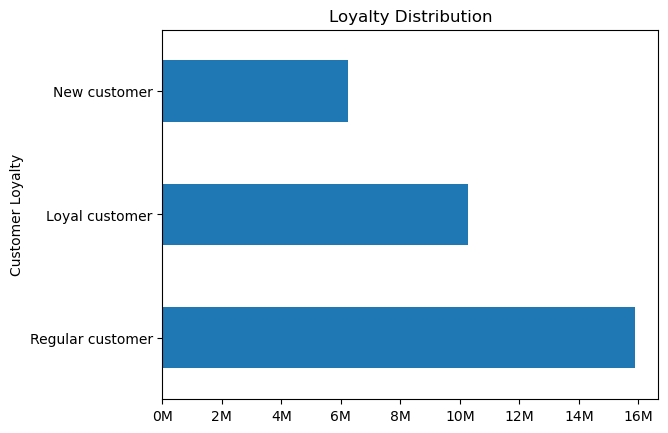

In [31]:
#plot bar chart to see the distribution of orders among customers in terms of loyalty
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", x="Number of Orders")
plt.title('Loyalty Distribution', fontsize=12)
bar_loyal.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))

In [32]:
# Calculation percentage 
print("Regular Customer:", (15876776 / 32404859 * 100), "%")
print("Loyal Customer:", (10284093 / 32404859 * 100), "%")
print("New Customer:", (6243990 / 32404859 * 100), "%")

Regular Customer: 48.995047316823694 %
Loyal Customer: 31.736268317044676 %
New Customer: 19.268684366131637 %


The most orders are made by Regular Customers: 49%. Least orders are made by new customers: 19%

# 5. Analyze hour of the day vs prices

In [33]:
# Extracting relevant columns and checking the dataframe
df_small_hod_prices = small[['hour_of_day_ordered', 'prices']]

In [34]:
df_small_hod_prices.head()

,hour_of_day_ordered,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

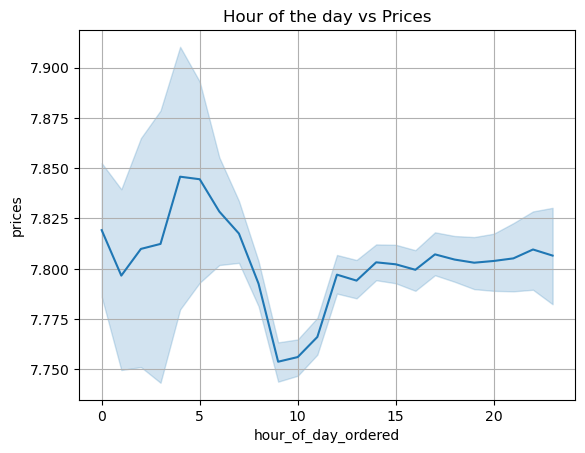

In [35]:
# Creating a line graph to check correlation between order hours and prices
line_hdo_prices=sns.lineplot(data=df_small_hod_prices, x='hour_of_day_ordered', y='prices')
plt.title('Hour of the day vs Prices', fontsize=12)
plt.grid()

Expences are highest at 4am

In [36]:
# Exporting line graph
line_hdo_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_hdo_vs_prices.png'))

# 6. Analyze correlation between age and number of dependants 

In [37]:
# Extracting relevant columns and checking the dataframe
df_age_dependants = df_ords_customers[['age','n_dependants']]

In [38]:
df_age_dependants.head()

,age,n_dependants
0,81,1
1,81,1
2,81,1
3,81,1
4,81,1


/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

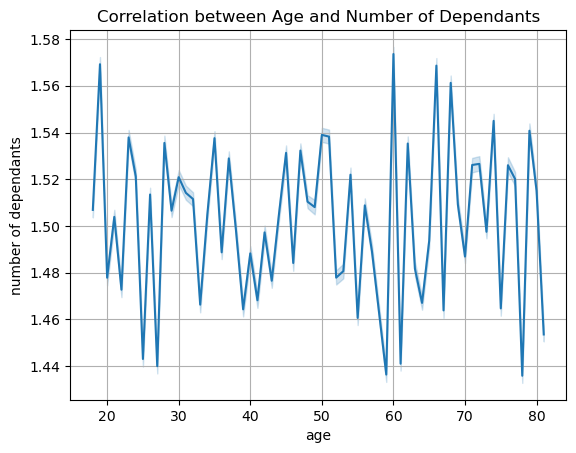

In [39]:
# Creating a line graph to check for correlation
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Correlation between Age and Number of Dependants')
plt.grid()

There is no correlation 

In [40]:
# Exporting line graph
line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/correlation_age_ndependants.png'))

# 7. Analyze connection between age and spending power (income)

In [41]:
# Extracting relevant columns and checking the dataframe
df_age_income = df_ords_customers[['age','income']]

In [42]:
df_age_income.head()

,age,income
0,81,49620
1,81,49620
2,81,49620
3,81,49620
4,81,49620


/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

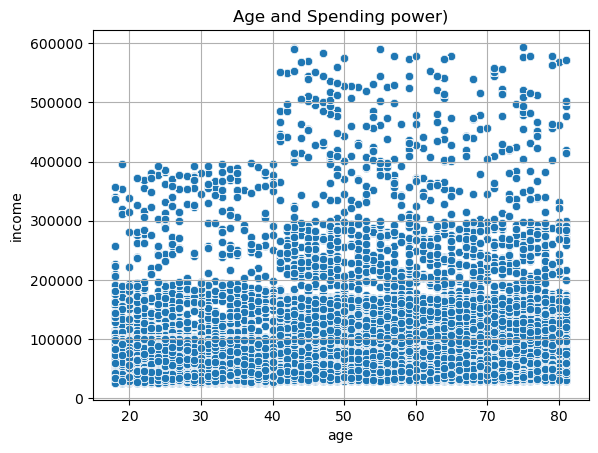

In [43]:
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age and Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

Individuals under the age of 40 generally exhibit lower spending power in comparison to those aged 40 and above. The majority of customers between the ages of 20 and 40 report incomes up to 200 000 with a minimal percentage reaching 400 000. On the other hand, the majority of customers above age 40 have incomes around 300 000, while the remaining portion reports earnings up to 600 000.

In [44]:
# Exporting scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_age_income.png'))